In [ ]:
from google.colab import drive 
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="whitegrid")
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE" # --> solving "The kernel appears to have died" error
import glob as gb
# conda install opencv
# pip3 install opencv-python   # --> solving No name error
import cv2
import tensorflow as tf
import keras
import csv
from tensorflow.keras import losses, optimizers, metrics, regularizers
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import classification_report,confusion_matrix

from keras.applications import ResNet50,EfficientNetB0
from keras.applications.mobilenet import MobileNet
from keras import models
from keras import layers
from keras.models import load_model

working_directory = '/content/drive/MyDrive/DATAa'

## Read and visualize data from the CSV file

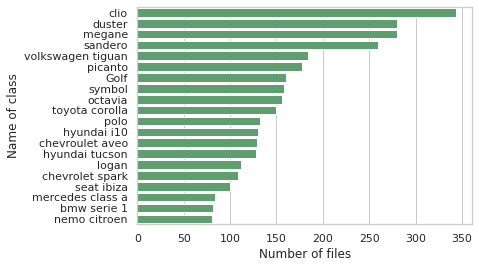

In [ ]:
csv_df = pd.read_csv('/content/drive/MyDrive/number_of_samples.csv', skiprows = 1, names = ['code', 'Name of class', 'Number of files'])
#print(csv_df)
#csv_df = pd.read_csv(working_directory+'/content/drive/MyDrive/number_of_samples.csv', skiprows = 1, names = ['code', 'Name of class', 'Number of files'])

#print(csv_df.sort_values("Number of files", ascending = False))

ax = sns.barplot(data=csv_df.sort_values("Number of files", ascending = False),
            x="Number of files", y="Name of class", orient="h", color="g")
#ax.bar_label(ax.containers[0])

## getcodes function

In [ ]:
flat_list = list(csv_df["Name of class"])
print(flat_list)

codes = dict(zip(csv_df["Name of class"], csv_df["code"]))
codes



['bmw serie 1', 'chevrolet spark', 'chevroulet aveo', 'clio', 'duster', 'Golf', 'hyundai i10', 'hyundai tucson', 'logan', 'megane', 'mercedes class a', 'nemo citroen', 'octavia', 'picanto', 'polo', 'sandero', 'seat ibiza', 'symbol', 'toyota corolla', 'volkswagen tiguan']


{'bmw serie 1': 0,
 'chevrolet spark': 1,
 'chevroulet aveo': 2,
 'clio': 3,
 'duster': 4,
 'Golf': 5,
 'hyundai i10': 6,
 'hyundai tucson': 7,
 'logan': 8,
 'megane': 9,
 'mercedes class a': 10,
 'nemo citroen': 11,
 'octavia': 12,
 'picanto': 13,
 'polo': 14,
 'sandero': 15,
 'seat ibiza': 16,
 'symbol': 17,
 'toyota corolla': 18,
 'volkswagen tiguan': 19}

In [ ]:
def getcode(n) : 
    for x , y in codes.items() : 
        if n == y : 
            return x  

**Working** with directories and files **

In [ ]:
# go through the directories and files of dataset, print full paths

input_folder = working_directory + "//DATA"
#input_folder = "/content/drive/MyDrive/DATAa"

for subdir, dirs, files in os.walk(input_folder):
    for file in files:
        print(os.path.join(subdir, file))

/content/drive/MyDrive/DATAa//DATA/toyota corolla/car1487.jpg
/content/drive/MyDrive/DATAa//DATA/toyota corolla/car1433.jpg
/content/drive/MyDrive/DATAa//DATA/toyota corolla/back1529.jpg
/content/drive/MyDrive/DATAa//DATA/toyota corolla/car1444.jpg
/content/drive/MyDrive/DATAa//DATA/toyota corolla/car1473.jpg
/content/drive/MyDrive/DATAa//DATA/toyota corolla/back1508.jpg
/content/drive/MyDrive/DATAa//DATA/toyota corolla/back1494.jpg
/content/drive/MyDrive/DATAa//DATA/toyota corolla/car1426.jpg
/content/drive/MyDrive/DATAa//DATA/toyota corolla/back1553.jpg
/content/drive/MyDrive/DATAa//DATA/toyota corolla/car1454.jpg
/content/drive/MyDrive/DATAa//DATA/toyota corolla/car1493.jpg
/content/drive/MyDrive/DATAa//DATA/toyota corolla/car1485.jpg
/content/drive/MyDrive/DATAa//DATA/toyota corolla/back1542.jpg
/content/drive/MyDrive/DATAa//DATA/toyota corolla/back1545.jpg
/content/drive/MyDrive/DATAa//DATA/toyota corolla/car1436.jpg
/content/drive/MyDrive/DATAa//DATA/toyota corolla/back1549.jpg
/

Files in  /content/drive/MyDrive/DATAa//DATA 0
Files in  /content/drive/MyDrive/DATAa//DATA/toyota corolla 147
Files in  /content/drive/MyDrive/DATAa//DATA/octavia 145
Files in  /content/drive/MyDrive/DATAa//DATA/polo 114
Files in  /content/drive/MyDrive/DATAa//DATA/nemo citroen 71
Files in  /content/drive/MyDrive/DATAa//DATA/volkswagen tiguan 164
Files in  /content/drive/MyDrive/DATAa//DATA/mercedes class a 68
Files in  /content/drive/MyDrive/DATAa//DATA/sandero 224
Files in  /content/drive/MyDrive/DATAa//DATA/seat ibiza 84
Files in  /content/drive/MyDrive/DATAa//DATA/symbol 148
Files in  /content/drive/MyDrive/DATAa//DATA/picanto 133
Files in  /content/drive/MyDrive/DATAa//DATA/chevroulet aveo 115
Files in  /content/drive/MyDrive/DATAa//DATA/logan 48
Files in  /content/drive/MyDrive/DATAa//DATA/hyundai i10 118
Files in  /content/drive/MyDrive/DATAa//DATA/Golf 130
Files in  /content/drive/MyDrive/DATAa//DATA/hyundai tucson 117
Files in  /content/drive/MyDrive/DATAa//DATA/chevrolet spa

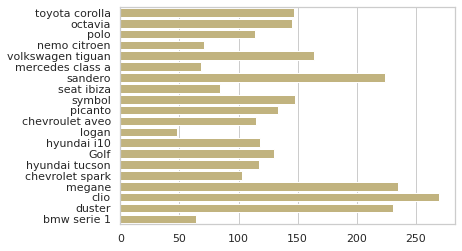

In [ ]:
N = 0  # total files
Number_of_files = []
for subdir, dirs, files in os.walk(input_folder):
    N_c = len(files)
    N += N_c
    print ("Files in ", subdir, N_c)
    if len(files) < 1:
        continue 
    Number_of_files.append(len(files))
print( "Total Files ",N)

#print(Number_of_files)
Directory_Name = os.listdir(input_folder)
#Directory_Name

df = pd.DataFrame({"Directory_Name": Directory_Name,
                   "Number_of_files": Number_of_files})
print(df)

ax = sns.barplot(data = df, x=Number_of_files, y=Directory_Name, orient="h", color="y")
#ax.bar_label(ax.containers[0])

In [ ]:
fnames = sorted(os.listdir(input_folder))
num_files = len(fnames)
print(num_files)
images_list = []
obj = {}
i = 0

while i < num_files:
    images_list = []
    files= os.listdir(input_folder+'//'+fnames[i])
    for file in files:
      images_list.append(os.path.join(input_folder+'//'+fnames[i], file))
    obj[fnames[i]] = images_list 
    i += 1
    
obj.keys()

20


dict_keys(['Golf', 'bmw serie 1', 'chevrolet spark', 'chevroulet aveo', 'clio', 'duster', 'hyundai i10', 'hyundai tucson', 'logan', 'megane', 'mercedes class a', 'nemo citroen', 'octavia', 'picanto', 'polo', 'sandero', 'seat ibiza', 'symbol', 'toyota corolla', 'volkswagen tiguan'])

remove duplicated images from the dataset

In [ ]:
pip install imagehash

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 KB 22.8 MB/s eta 0:00:00


In [ ]:
from PIL import Image
import imagehash

# image_fns : List of training image files
for key, value in obj.items():
 image_fns = value
 #print(image_fns)
 img_hashes = {}

 for img_fn in sorted(image_fns):
    hash = imagehash.average_hash(Image.open(img_fn))
    if hash in img_hashes:
        #print( '{} duplicate of {}'.format(img_fn, img_hashes[hash]) )
        #print('************************************************************')
        os.remove(img_fn)
        
    else:
        img_hashes[hash] = img_fn

Files in  /content/drive/MyDrive/DATAa//DATA 0
Files in  /content/drive/MyDrive/DATAa//DATA/toyota corolla 147
Files in  /content/drive/MyDrive/DATAa//DATA/octavia 145
Files in  /content/drive/MyDrive/DATAa//DATA/polo 114
Files in  /content/drive/MyDrive/DATAa//DATA/nemo citroen 71
Files in  /content/drive/MyDrive/DATAa//DATA/volkswagen tiguan 164
Files in  /content/drive/MyDrive/DATAa//DATA/mercedes class a 68
Files in  /content/drive/MyDrive/DATAa//DATA/sandero 224
Files in  /content/drive/MyDrive/DATAa//DATA/seat ibiza 84
Files in  /content/drive/MyDrive/DATAa//DATA/symbol 148
Files in  /content/drive/MyDrive/DATAa//DATA/picanto 133
Files in  /content/drive/MyDrive/DATAa//DATA/chevroulet aveo 115
Files in  /content/drive/MyDrive/DATAa//DATA/logan 48
Files in  /content/drive/MyDrive/DATAa//DATA/hyundai i10 118
Files in  /content/drive/MyDrive/DATAa//DATA/Golf 130
Files in  /content/drive/MyDrive/DATAa//DATA/hyundai tucson 117
Files in  /content/drive/MyDrive/DATAa//DATA/chevrolet spa

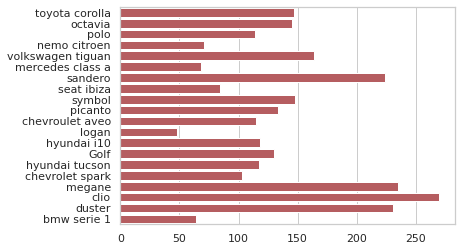

In [ ]:
# list total files, average per class, and any class has < 100 images
a=[]
N = 0  # total files
Number_of_files = []
for subdir, dirs, files in os.walk(input_folder):
    N_c = len(files)
    N += N_c
    print ("Files in ", subdir, N_c)
    if N_c>0 and N_c<100: 
     a.append(subdir)
    if len(files) < 1:
        continue 
    Number_of_files.append(len(files))
print( "Total Files ",N)
print( "Average Files ",N/20)
print(a)

#print(Number_of_files)
Directory_Name = os.listdir(input_folder)
#Directory_Name

df = pd.DataFrame({"Directory_Name": Directory_Name,
                   "Number_of_files": Number_of_files})
print(df)

ax = sns.barplot(data = df, x=Number_of_files, y=Directory_Name, orient="h", color="r")
#ax.bar_label(ax.containers[0])

Splitting dataset into train, val, and test

In [ ]:
pip install split-folders


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import splitfolders
input_folder = working_directory+"/DATA"
output = working_directory+"/DATA_SPLIT"

splitfolders.ratio(input_folder, output=output, seed=42, ratio=(.7, .2, .1))

In [ ]:
trainpath = working_directory+"/DATA_SPLIT/"
testpath = working_directory+"/DATA_SPLIT/"
predpath = working_directory+"/DATA_SPLIT/"
print(trainpath)
print(testpath)
print(predpath)

/content/drive/MyDrive/DATAa/DATA_SPLIT/
/content/drive/MyDrive/DATAa/DATA_SPLIT/
/content/drive/MyDrive/DATAa/DATA_SPLIT/


For training data , found 102 in folder toyota corolla
For training data , found 101 in folder octavia
For training data , found 79 in folder polo
For training data , found 49 in folder nemo citroen
For training data , found 114 in folder volkswagen tiguan
For training data , found 47 in folder mercedes class a
For training data , found 156 in folder sandero
For training data , found 58 in folder seat ibiza
For training data , found 103 in folder symbol
For training data , found 93 in folder picanto
For training data , found 80 in folder chevroulet aveo
For training data , found 33 in folder logan
For training data , found 82 in folder hyundai i10
For training data , found 91 in folder Golf
For training data , found 81 in folder hyundai tucson
For training data , found 72 in folder chevrolet spark
For training data , found 164 in folder megane
For training data , found 189 in folder clio
For training data , found 161 in folder duster
For training data , found 44 in folder bmw serie 1
1

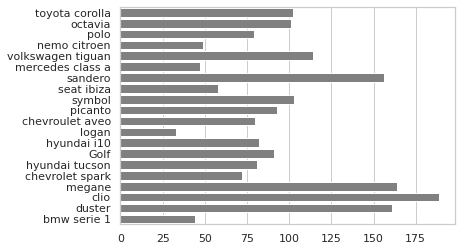

In [ ]:
N=0
Number_of_files = []
for folder in  os.listdir(trainpath + 'train') : 
    files = gb.glob(pathname= str( trainpath +'train//' + folder + '/*.jpg'))
    N+=len(files)
    print(f'For training data , found {len(files)} in folder {folder}')
    if len(files) < 1:
        continue 
    Number_of_files.append(len(files))
print(N)
print(N/20)

#print(Number_of_files)
Directory_Name = os.listdir(trainpath + 'train')
#Directory_Name

df = pd.DataFrame({"Directory_Name": Directory_Name,
                   "Number_of_files": Number_of_files})
print(df)

ax = sns.barplot(data = df, x=Number_of_files, y=Directory_Name, orient="h", color="gray")
#ax.bar_label(ax.containers[0])

For training data , found 16 in folder toyota corolla
For training data , found 15 in folder octavia
For training data , found 13 in folder polo
For training data , found 8 in folder nemo citroen
For training data , found 18 in folder volkswagen tiguan
For training data , found 8 in folder mercedes class a
For training data , found 24 in folder sandero
For training data , found 10 in folder seat ibiza
For training data , found 16 in folder symbol
For training data , found 14 in folder picanto
For training data , found 12 in folder chevroulet aveo
For training data , found 6 in folder logan
For training data , found 13 in folder hyundai i10
For training data , found 13 in folder Golf
For training data , found 13 in folder hyundai tucson
For training data , found 11 in folder chevrolet spark
For training data , found 24 in folder megane
For training data , found 27 in folder clio
For training data , found 24 in folder duster
For training data , found 8 in folder bmw serie 1
293
14.65
   

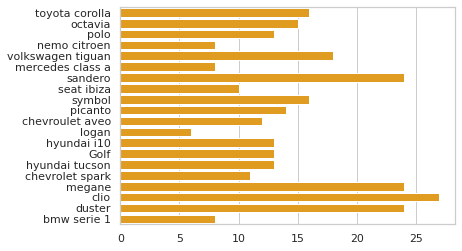

In [ ]:
N=0
Number_of_files = []
for folder in  os.listdir(testpath + 'test') : 
    files = gb.glob(pathname= str( testpath +'test//' + folder + '/*.jpg'))
    N+=len(files)
    print(f'For training data , found {len(files)} in folder {folder}')
    if len(files) < 1:
        continue 
    Number_of_files.append(len(files))
print(N)
print(N/20)

#print(Number_of_files)
Directory_Name = os.listdir(testpath + 'test')
#Directory_Name

df = pd.DataFrame({"Directory_Name": Directory_Name,
                   "Number_of_files": Number_of_files})
print(df)

ax = sns.barplot(data = df, x=Number_of_files, y=Directory_Name, orient="h", color="orange")


For prediction data , found 29 in folder toyota corolla
For prediction data , found 29 in folder octavia
For prediction data , found 22 in folder polo
For prediction data , found 14 in folder nemo citroen
For prediction data , found 32 in folder volkswagen tiguan
For prediction data , found 13 in folder mercedes class a
For prediction data , found 44 in folder sandero
For prediction data , found 16 in folder seat ibiza
For prediction data , found 29 in folder symbol
For prediction data , found 26 in folder picanto
For prediction data , found 23 in folder chevroulet aveo
For prediction data , found 9 in folder logan
For prediction data , found 23 in folder hyundai i10
For prediction data , found 26 in folder Golf
For prediction data , found 23 in folder hyundai tucson
For prediction data , found 20 in folder chevrolet spark
For prediction data , found 47 in folder megane
For prediction data , found 54 in folder clio
For prediction data , found 46 in folder duster
For prediction data , f

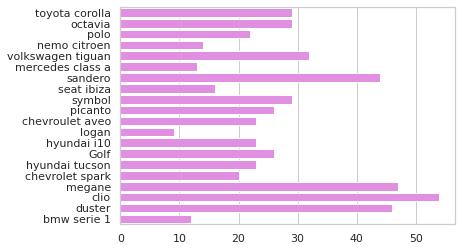

In [ ]:
N=0
Number_of_files = []
for folder in  os.listdir(predpath + 'val') : 
    files = gb.glob(pathname= str( predpath +'val//' + folder + '/*.jpg'))
    N+=len(files)
    print(f'For prediction data , found {len(files)} in folder {folder}')
    if len(files) < 1:
        continue 
    Number_of_files.append(len(files))
print(N)
print(N/20)

#print(Number_of_files)
Directory_Name = os.listdir(predpath + 'val')
#Directory_Name

df = pd.DataFrame({"Directory_Name": Directory_Name,
                   "Number_of_files": Number_of_files})
print(df)

ax = sns.barplot(data = df, x=Number_of_files, y=Directory_Name, orient="h", color="violet")


## check dataset images size(dimension)


In [ ]:
size = []
for folder in  os.listdir(trainpath +'train') : 
    files = gb.glob(pathname= str( trainpath +'train/' + folder + '/*.jpg'))
    for file in files: 
        image = plt.imread(file)
        size.append(image.shape)
pd.Series(size).value_counts()

(224, 224, 3)    2195
dtype: int64

In [ ]:
size = []
for folder in  os.listdir(testpath +'test') : 
    files = gb.glob(pathname= str( testpath +'test//' + folder + '/*.jpg'))
    for file in files: 
        image = plt.imread(file)
        size.append(image.shape)
pd.Series(size).value_counts()

(224, 224, 3)    296
dtype: int64

In [ ]:
size = []
#files = gb.glob(pathname= str( predpath +'val/*.jpg'))

for folder in  os.listdir(predpath +'val'): 
 files = gb.glob(pathname= str( predpath +'val//'+ folder + '/*.jpg') )
 for file in files: 
        image = plt.imread(file)
        size.append(image.shape)
pd.Series(size).value_counts()

(224, 224, 3)    545
dtype: int64

## resize and display dataset images


In [ ]:
s=185
batch_size=64


In [ ]:
X_train = []
y_train = []
for folder in  os.listdir(trainpath +'train') : 
 files = gb.glob(pathname= str( trainpath +'train//' + folder + '/*.jpg'))
 for file in files: 
        image = cv2.imread(file)
        image_array = cv2.resize(image , (s,s))
        X_train.append(list(image_array))
        y_train.append(codes[folder])

print(f'we have {len(X_train)} items in X_train')

we have 1899 items in X_train


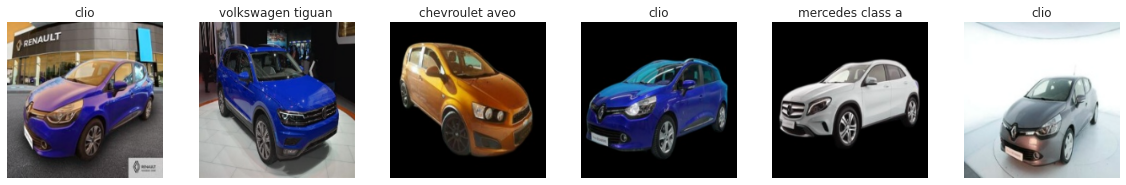

In [ ]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_train),6))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(X_train[i])   
    plt.axis('off')
    plt.title(getcode(y_train[i]))

In [ ]:
X_test = []
y_test = []
for folder in  os.listdir(testpath +'test') : 
    files = gb.glob(pathname= str(testpath + 'test//' + folder + '/*.jpg'))
    for file in files: 
        image = cv2.imread(file)
        image_array = cv2.resize(image , (s,s))
        X_test.append(list(image_array))
        y_test.append(codes[folder])
print(f'we have {len(X_test)} items in X_test')

we have 293 items in X_test


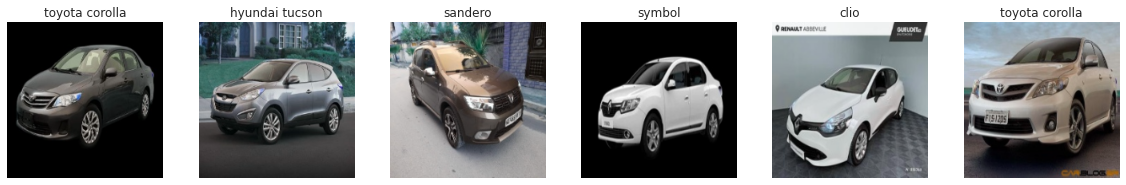

In [ ]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_test),6))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(X_test[i])    
    plt.axis('off')
    plt.title(getcode(y_test[i]))

In [ ]:
X_pred = []
for folder in  os.listdir(predpath +'val') : 
 files = gb.glob(pathname= str(predpath + 'val//'+ folder+'/*.jpg'))
 for file in files: 
     image = cv2.imread(file)
     image_array = cv2.resize(image , (s,s))
     X_pred.append(list(image_array)) 
print(f'we have {len(X_pred)} items in X_pred')

we have 537 items in X_pred


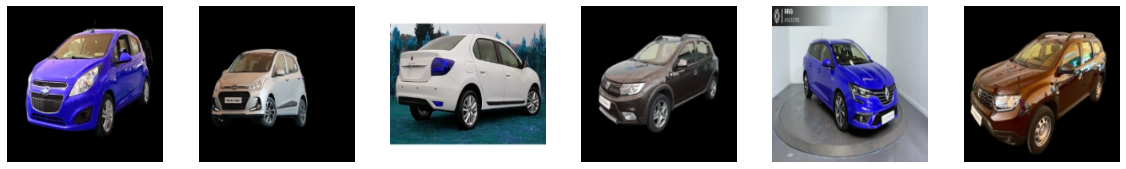

In [ ]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_pred),6))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(X_pred[i])    
    plt.axis('off')

Data Augmentation

In [ ]:

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=5,
      width_shift_range=0.1,
      height_shift_range=0.1,
      horizontal_flip=True,
      fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)


In [ ]:
train_generator = train_datagen.flow_from_directory(
        trainpath+r"/train",
        target_size=(s,s),
        class_mode='categorical',
       batch_size=batch_size
)

Found 2177 images belonging to 20 classes.


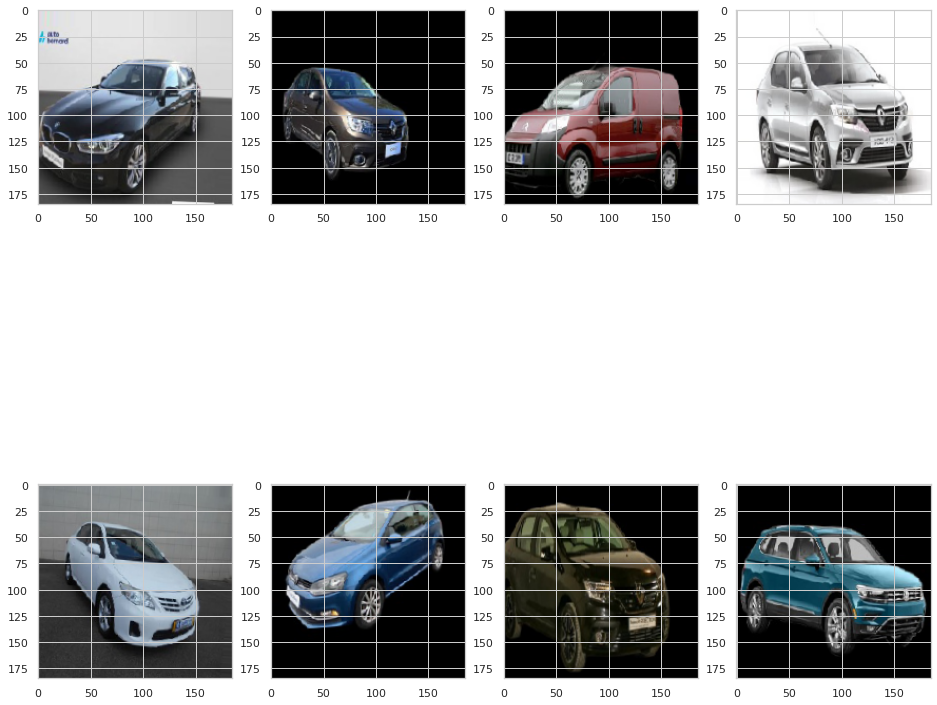

In [ ]:
plt.figure(figsize=(16,16))
for x,y in train_generator:
  for i in range(0,8):
    plt.subplot(2,4,i+1)
    plt.imshow(x[i])
  plt.show()
  break


In [ ]:
# Data Generator for Validation data

validation_generator = validation_datagen.flow_from_directory(
        predpath+'/val',
        target_size=(s, s),
        batch_size=val_batchsize,
        class_mode='sparse',
        shuffle=False)

# Data Generator for test data
test_generator = test_datagen.flow_from_directory(
        predpath+'/test',
        target_size=(s, s),
        batch_size=val_batchsize,
        class_mode='sparse',
        shuffle=False)


Found 536 images belonging to 20 classes.
Found 275 images belonging to 20 classes.


**Model** **Building**

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization

model = Sequential()

model.add(Conv2D(64, (5,5), activation='relu', input_shape=(s, s, 3)))
model.add(Conv2D(filters=64, kernel_size=(5,5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.15))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.15))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.15))
model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.25))
model.add(Dense(20, activation='softmax'))

# Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 181, 181, 64)      4864      
                                                                 
 conv2d_1 (Conv2D)           (None, 177, 177, 64)      102464    
                                                                 
 max_pooling2d (MaxPooling2D  (None, 88, 88, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 88, 88, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 86, 86, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 43, 43, 64)       0         
 2D)                                                    

In [ ]:
earlystop = EarlyStopping(patience=10)
callbacks = [earlystop]

history = model.fit(
    train_generator, 
    epochs=50,
    validation_data=validation_generator,
    batch_size=batch_size,
    callbacks=callbacks
)


Epoch 1/50
69/69 [==============================] - 28s 369ms/step - loss: 2.9509 - accuracy: 0.0993 - val_loss: 2.9410 - val_accuracy: 0.0862
Epoch 2/50
69/69 [==============================] - 25s 366ms/step - loss: 2.9137 - accuracy: 0.0911 - val_loss: 2.8690 - val_accuracy: 0.1046
Epoch 3/50
69/69 [==============================] - 24s 346ms/step - loss: 2.8859 - accuracy: 0.1107 - val_loss: 2.8546 - val_accuracy: 0.1248
Epoch 4/50
69/69 [==============================] - 24s 346ms/step - loss: 2.8363 - accuracy: 0.1280 - val_loss: 2.7550 - val_accuracy: 0.1670
Epoch 5/50
69/69 [==============================] - 25s 367ms/step - loss: 2.7158 - accuracy: 0.1686 - val_loss: 2.6578 - val_accuracy: 0.2092
Epoch 6/50
69/69 [==============================] - 24s 349ms/step - loss: 2.5189 - accuracy: 0.2273 - val_loss: 2.3829 - val_accuracy: 0.3138
Epoch 7/50
69/69 [==============================] - 24s 352ms/step - loss: 2.2960 - accuracy: 0.3043 - val_loss: 2.1434 - val_accuracy: 0.3743

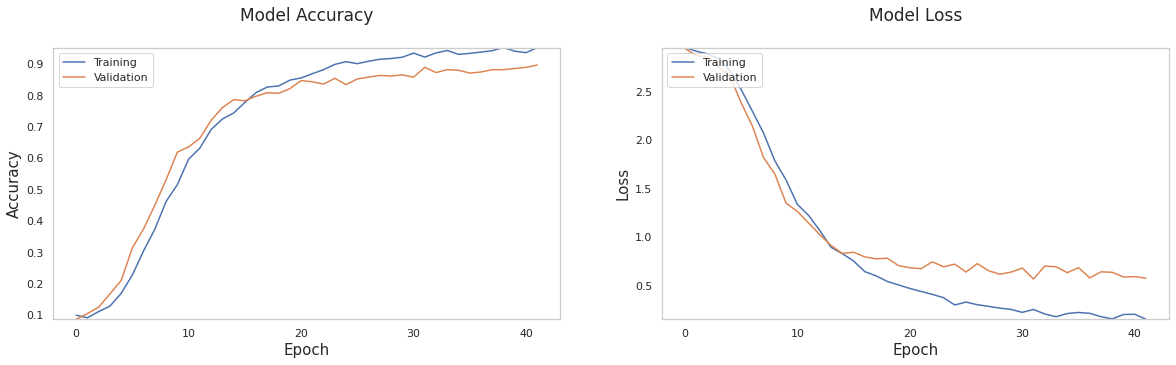

In [ ]:
ylim_pad=[0, 0]
xlabel = 'Epoch'
legends = ['Training', 'Validation']
plt.figure(figsize=(20, 5))
y1 = history.history['accuracy']
y2 = history.history['val_accuracy']
min_y = min(min(y1), min(y2))-ylim_pad[0]
max_y = max(max(y1), max(y2))+ylim_pad[0]
plt.subplot(121)
plt.plot(y1)
plt.plot(y2)
plt.title('Model Accuracy\n', fontsize=17)
plt.xlabel(xlabel, fontsize=15)
plt.ylabel('Accuracy', fontsize=15)
plt.ylim(min_y, max_y)
plt.legend(legends, loc='upper left')
plt.grid()
y1 = history.history['loss']
y2 = history.history['val_loss']
min_y = min(min(y1), min(y2))-ylim_pad[1]
max_y = max(max(y1), max(y2))+ylim_pad[1]
plt.subplot(122)
plt.plot(y1)
plt.plot(y2)
plt.title('Model Loss\n', fontsize=17)
plt.xlabel(xlabel, fontsize=15)
plt.ylabel('Loss', fontsize=15)
plt.ylim(min_y, max_y)
plt.legend(legends, loc='upper left')
plt.grid()
plt.show()

In [ ]:
predict = model.predict_generator(test_generator)
predicted_classes = np.argmax(predict, axis=1)

<ipython-input-93-0524b258b557>:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predict = model.predict_generator(test_generator)


In [ ]:


true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys()) 
report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)

                   precision    recall  f1-score   support

             Golf       0.47      0.50      0.48        14
      bmw serie 1       1.00      0.38      0.55         8
  chevrolet spark       0.83      0.83      0.83        12
  chevroulet aveo       0.89      0.67      0.76        12
             clio       0.84      0.93      0.89        29
           duster       0.75      0.88      0.81        24
      hyundai i10       1.00      0.92      0.96        13
   hyundai tucson       0.80      0.62      0.70        13
            logan       0.56      0.83      0.67         6
           megane       0.75      0.75      0.75        24
 mercedes class a       0.88      0.88      0.88         8
     nemo citroen       0.83      0.62      0.71         8
          octavia       0.79      0.94      0.86        16
          picanto       0.83      0.71      0.77        14
             polo       0.91      0.77      0.83        13
          sandero       0.61      0.74      0.67       

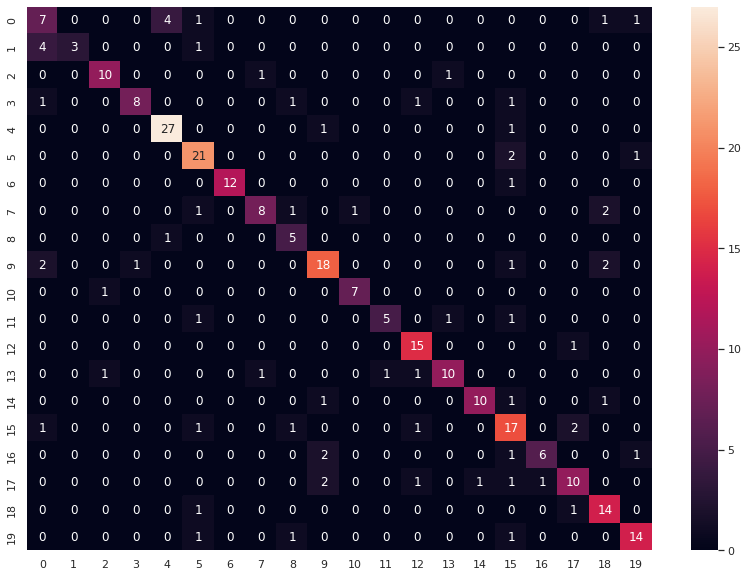

In [ ]:
conf_matrix = confusion_matrix(true_classes, predicted_classes)
plt.figure(figsize = (14,10))
sns.heatmap(conf_matrix, annot=True)

**Building Transfer learning Model**

In [ ]:
# Change the batchsize according to your system 
train_batchsize = 80
val_batchsize = 30
s=256

In [ ]:
#Load the MobileNe model
Mob_Net = MobileNet(weights='imagenet', include_top=False, input_shape=(image_size, image_size, 3))

# Freeze all the layers
for layer in Mob_Net.layers[:-4]:
    layer.trainable = False

# Check the trainable status of the individual layers
for layer in Mob_Net.layers:
    print(layer, layer.trainable)


<keras.engine.input_layer.InputLayer object at 0x7f3d54977d30> False
<keras.layers.convolutional.conv2d.Conv2D object at 0x7f3d50647cd0> False
<keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7f3d5469c730> False
<keras.layers.activation.relu.ReLU object at 0x7f3d50647e20> False
<keras.layers.convolutional.depthwise_conv2d.DepthwiseConv2D object at 0x7f3d4f033b50> False
<keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7f3d44316490> False
<keras.layers.activation.relu.ReLU object at 0x7f3d44072d00> False
<keras.layers.convolutional.conv2d.Conv2D object at 0x7f3d40726910> False
<keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7f3d44072310> False
<keras.layers.activation.relu.ReLU object at 0x7f3d546ee190> False
<keras.layers.reshaping.zero_padding2d.ZeroPadding2D object at 0x7f3d546ee220> False
<keras.layers.convolutional.depthwise_conv2d.DepthwiseConv2D object at 0x7f3d4fbdf670> False
<keras.layers.

In [ ]:
# Create the model
model = models.Sequential()
# Add the Mob_Net convolutional base model
model.add(Mob_Net)
# Add new layers
model.add(layers.Flatten())

model.add(layers.Dense(20, activation='softmax',kernel_regularizer=regularizers.l1_l2(l1=0.0001,l2=0.0001)))


# Show a summary of the model. Check the number of trainable parameters
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functio  (None, 8, 8, 1024)       3228864   
 nal)                                                            
                                                                 
 flatten_3 (Flatten)         (None, 65536)             0         
                                                                 
 dense_4 (Dense)             (None, 20)                1310740   
                                                                 
Total params: 4,539,604
Trainable params: 2,361,364
Non-trainable params: 2,178,240
_________________________________________________________________


In [ ]:
# Compile the model


model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

#To prevent over fitting we will stop the learning after 10 epochs and val_loss value not decreased
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss', 
                                            patience=2, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)
earlystop = EarlyStopping(monitor = 'val_loss' , patience = 10, verbose = 1, mode = 'min')
 
callbacks = [earlystop, learning_rate_reduction]

In [ ]:
# Train the Model

history = model.fit(train_generator,steps_per_epoch=train_generator.samples//train_generator.batch_size,
          epochs=100,
          validation_data=validation_generator,
          validation_steps=validation_generator.samples//validation_generator.batch_size,callbacks =[callbacks])

Epoch 1/100
25/25 [==============================] - 562s 22s/step - loss: 16.8586 - accuracy: 0.2761 - val_loss: 32.3377 - val_accuracy: 0.2734 - lr: 0.0010


Epoch 2/100
25/25 [==============================] - 134s 5s/step - loss: 3.1234 - accuracy: 0.7300 - val_loss: 28.9990 - val_accuracy: 0.3359 - lr: 0.0010


Epoch 3/100
25/25 [==============================] - 133s 5s/step - loss: 1.9161 - accuracy: 0.8340 - val_loss: 15.2646 - val_accuracy: 0.3906 - lr: 0.0010


Epoch 4/100
25/25 [==============================] - 132s 5s/step - loss: 1.4976 - accuracy: 0.8847 - val_loss: 16.3594 - val_accuracy: 0.4531 - lr: 0.0010


Epoch 5/100
25/25 [==============================] - 135s 5s/step - loss: 1.2251 - accuracy: 0.9232 - val_loss: 7.3843 - val_accuracy: 0.6250 - lr: 0.0010

Epoch 6/100
25/25 [==============================] - 132s 5s/step - loss: 1.2492 - accuracy: 0.9257 - val_loss: 11.9300 - val_accuracy: 0.5078 - lr: 0.0010


Epoch 7/100
25/25 [==============================] - 132s 5s/step - loss: 1.0945 - accuracy: 0.9493 - val_loss: 3.8641 - val_accuracy: 0.7422 - lr: 0.0010


Epoch 8/100
25/25 [==============================] - 132s 5s/step - loss: 1.0526 - accuracy: 0.9498 - val_loss: 4.0335 - val_accuracy: 0.7500 - lr: 0.0010
Epoch 9/100
25/25 [==============================] - 132s 5s/step - loss: 1.0918 - accuracy: 0.9447 - val_loss: 3.7128 - val_accuracy: 0.7812 - lr: 0.0010

Epoch 10/100
25/25 [==============================] - 135s 5s/step - loss: 1.0307 - accuracy: 0.9550 - val_loss: 5.1003 - val_accuracy: 0.7422 - lr: 0.0010

Epoch 11/100
25/25 [==============================] - ETA: 0s - loss: 0.9795 - accuracy: 0.9570
Epoch 11: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

25/25 [==============================] - 133s 5s/step - loss: 0.9795 - accuracy: 0.9570 - val_loss: 3.8879 - val_accuracy: 0.7266 - lr: 0.0010


Epoch 12/100
25/25 [==============================] - 134s 5s/step - loss: 0.8974 - accuracy: 0.9744 - val_loss: 4.1807 - val_accuracy: 0.7109 - lr: 5.0000e-04


Epoch 13/100
25/25 [==============================] - 131s 5s/step - loss: 0.8634 - accuracy: 0.9816 - val_loss: 2.1564 - val_accuracy: 0.8281 - lr: 5.0000e-04


Epoch 14/100
25/25 [==============================] - 132s 5s/step - loss: 0.8023 - accuracy: 0.9903 - val_loss: 2.3549 - val_accuracy: 0.8438 - lr: 5.0000e-04


Epoch 15/100
25/25 [==============================] - 132s 5s/step - loss: 0.7839 - accuracy: 0.9898 - val_loss: 1.7443 - val_accuracy: 0.8906 - lr: 5.0000e-04
Epoch 16/100
25/25 [==============================] - 132s 5s/step - loss: 0.7760 - accuracy: 0.9903 - val_loss: 1.6397 - val_accuracy: 0.9141 - lr: 5.0000e-04

Epoch 17/100
25/25 [==============================] - 132s 5s/step - loss: 0.7641 - accuracy: 0.9923 - val_loss: 1.7807 - val_accuracy: 0.9219 - lr: 5.0000e-04


Epoch 18/100
25/25 [==============================] - 131s 5s/step - loss: 0.7394 - accuracy: 0.9918 - val_loss: 1.5661 - val_accuracy: 0.9297 - lr: 5.0000e-04

Epoch 19/100
25/25 [==============================] - 132s 5s/step - loss: 0.7313 - accuracy: 0.9923 - val_loss: 1.6943 - val_accuracy: 0.9062 - lr: 5.0000e-04

Epoch 20/100
25/25 [==============================] - 133s 5s/step - loss: 0.7079 - accuracy: 0.9960 - val_loss: 1.4530 - val_accuracy: 0.9297 - lr: 5.0000e-04
Epoch 21/100
25/25 [==============================] - 131s 5s/step - loss: 0.7090 - accuracy: 0.9939 - val_loss: 1.3878 - val_accuracy: 0.9297 - lr: 5.0000e-04
Epoch 22/100
25/25 [==============================] - 132s 5s/step - loss: 0.6991 - accuracy: 0.9933 - val_loss: 1.2836 - val_accuracy: 0.9297 - lr: 5.0000e-04

Epoch 23/100
25/25 [==============================] - 131s 5s/step - loss: 0.6787 - accuracy: 0.9954 - val_loss: 1.3640 - val_accuracy: 0.9141 - lr: 5.0000e-04

Epoch 24/100
25/25 [==============================] - 131s 5s/step - loss: 0.6594 - accuracy: 0.9964 - val_loss: 1.0983 - val_accuracy: 0.9453 - lr: 5.0000e-04

Epoch 25/100
25/25 [==============================] - 131s 5s/step - loss: 0.6428 - accuracy: 0.9954 - val_loss: 1.2186 - val_accuracy: 0.9531 - lr: 5.0000e-04

Epoch 26/100
25/25 [==============================] - ETA: 0s - loss: 0.6489 - accuracy: 0.9935
Epoch 26: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
25/25 [==============================] - 133s 5s/step - loss: 0.6489 - accuracy: 0.9935 - val_loss: 1.7156 - val_accuracy: 0.8984 - lr: 5.0000e-04

Epoch 27/100
25/25 [==============================] - 131s 5s/step - loss: 0.6256 - accuracy: 0.9939 - val_loss: 1.5361 - val_accuracy: 0.8984 - lr: 2.5000e-04

Epoch 28/100
25/25 [==============================] - ETA: 0s - loss: 0.6147 - accuracy: 0.9969
Epoch 28: ReduceLROnPlateau reducing learning rate to 0.0001250000059371814.

25/25 [==============================] - 131s 5s/step - loss: 0.6147 - accuracy: 0.9969 - val_loss: 1.2682 - val_accuracy: 0.9453 - lr: 2.5000e-04

Epoch 29/100
25/25 [==============================] - 131s 5s/step - loss: 0.6041 - accuracy: 0.9980 - val_loss: 1.2172 - val_accuracy: 0.9531 - lr: 1.2500e-04
Epoch 30/100
25/25 [==============================] - ETA: 0s - loss: 0.6005 - accuracy: 0.9990
Epoch 30: ReduceLROnPlateau reducing learning rate to 6.25000029685907e-05.
25/25 [==============================] - 131s 5s/step - loss: 0.6005 - accuracy: 0.9990 - val_loss: 1.1875 - val_accuracy: 0.9453 - lr: 1.2500e-04
Epoch 31/100
25/25 [==============================] - 131s 5s/step - loss: 0.6011 - accuracy: 0.9969 - val_loss: 1.1608 - val_accuracy: 0.9453 - lr: 6.2500e-05
Epoch 32/100
25/25 [==============================] - ETA: 0s - loss: 0.5935 - accuracy: 0.9995
Epoch 32: ReduceLROnPlateau reducing learning rate to 3.125000148429535e-05.

25/25 [==============================] - 131s 5s/step - loss: 0.5935 - accuracy: 0.9995 - val_loss: 1.1423 - val_accuracy: 0.9453 - lr: 6.2500e-05

Epoch 33/100
25/25 [==============================] - 131s 5s/step - loss: 0.5977 - accuracy: 0.9980 - val_loss: 1.1502 - val_accuracy: 0.9531 - lr: 3.1250e-05

Epoch 34/100
25/25 [==============================] - ETA: 0s - loss: 0.5930 - accuracy: 0.9990
Epoch 34: ReduceLROnPlateau reducing learning rate to 1.5625000742147677e-05.

25/25 [==============================] - 131s 5s/step - loss: 0.5930 - accuracy: 0.9990 - val_loss: 1.1529 - val_accuracy: 0.9531 - lr: 3.1250e-05
Epoch 34: early stopping

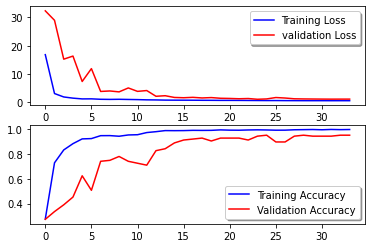


In [ ]:
# Save the Model
model.save('car_classification.h5')

In [ ]:
from keras.models import load_model
model=load_model("/content/drive/MyDrive/car_classification.h5")

scores = model.evaluate(test_generator)


24/24 [==============================] - 3s 98ms/step - loss: 0.9380 - accuracy: 0.9460


In [ ]:
Y_pred = model.predict_generator(test_generator,verbose=1, steps=test_generator.samples//test_generator.batch_size)
y_pred = np.argmax(Y_pred, axis=1)

<ipython-input-139-0bed7d9c10f8>:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  Y_pred = model.predict_generator(test_generator,verbose=1, steps=test_generator.samples//test_generator.batch_size)


23/23 [==============================] - 3s 100ms/step
